In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from scipy.stats import skew,kurtosis
from scipy.stats import f_oneway
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats import weightstats as stests
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



In [2]:
data = pd.read_csv('Stress-Lysis.csv')

df = pd.DataFrame(data)

In [5]:
df.head(10)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
5,11.31,80.31,40,0
6,18.16,87.16,88,1
7,28.20,97.20,162,2
8,14.25,83.25,61,0
9,26.13,95.13,168,2


## Data Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [7]:
df.dtypes

Humidity        float64
Temperature     float64
Step count        int64
Stress Level      int64
dtype: object

In [8]:
df.shape

(2001, 4)

In [9]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


## Visualizing Data

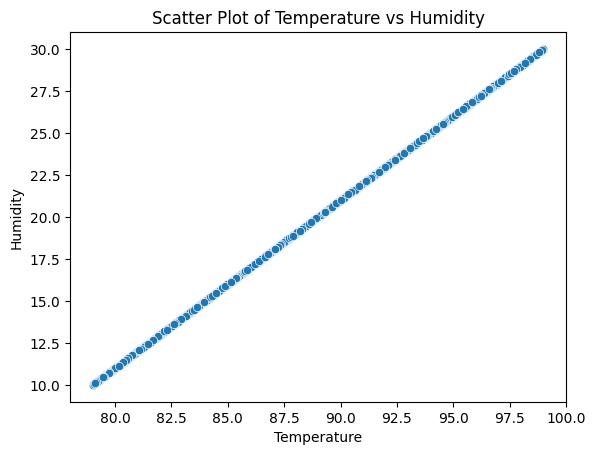

In [9]:
sns.scatterplot(x='Temperature', y='Humidity', data=df)
plt.title('Scatter Plot of Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

### we can notice that there is a strong relation between Temperature and Humidity

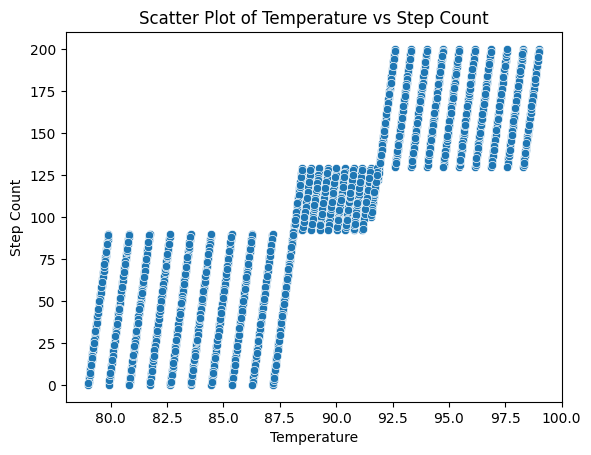

In [10]:
sns.scatterplot(x='Temperature', y='Step count', data=df)
plt.title('Scatter Plot of Temperature vs Step Count')
plt.xlabel('Temperature')
plt.ylabel('Step Count')
plt.show()


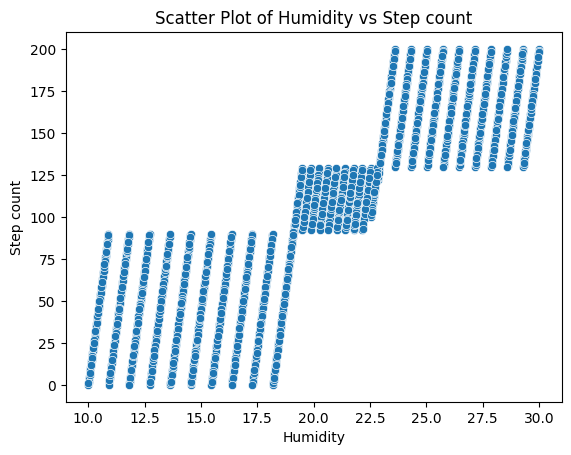

In [11]:
sns.scatterplot(x='Humidity', y='Step count', data=df)
plt.title('Scatter Plot of Humidity vs Step count')
plt.xlabel('Humidity')
plt.ylabel('Step count')
plt.show()

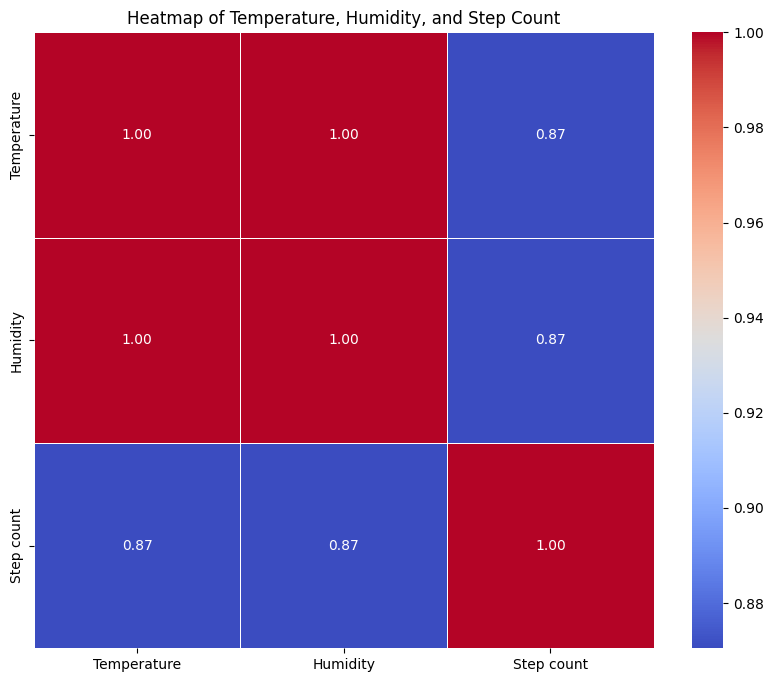

In [12]:

heatmap_data = df[['Temperature', 'Humidity', 'Step count']]

# Heatmap with annotations
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Temperature, Humidity, and Step Count')
plt.show()


## Missing Values Treatment

In [13]:
df.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

### There are no missing values , no need to infer the missing the values.

## Data Analysis part 1 

In [14]:
df.mean()

Humidity         20.000000
Temperature      89.000000
Step count      100.141429
Stress Level      1.104448
dtype: float64

In [15]:
df.max()

Humidity         30.0
Temperature      99.0
Step count      200.0
Stress Level      2.0
dtype: float64

In [16]:
## variance 
temperature_var = df['Temperature'].var()
step_count_var = df['Step count'].var()
humidity_var = df['Humidity'].var()

print("Variance of Temperature:", temperature_var)
print("Variance of Step Count:", step_count_var)
print("Variance of Humidity:", humidity_var)

Variance of Temperature: 33.38335000000001
Variance of Step Count: 3385.255487756122
Variance of Humidity: 33.38335


In [17]:
## standard deviation

temperature_std = np.sqrt(df['Temperature'].var())
step_count_std = np.sqrt(df['Step count'].var())
humidity_std = np.sqrt(df['Humidity'].var())

print("Standard Deviation of Temperature:", temperature_std)
print("Standard Deviation of Step Count:", step_count_std)
print("Standard Deviation of Humidity:", humidity_std)

Standard Deviation of Temperature: 5.777832638628434
Standard Deviation of Step Count: 58.18294842783513
Standard Deviation of Humidity: 5.777832638628433


### we can notice that step count has higly dispersed values.

Skewness of Temperature: -1.2970196034493975e-17
Skewness of Step Count: -0.006992990187487856
Skewness of Humidity: 1.1791087304085434e-18


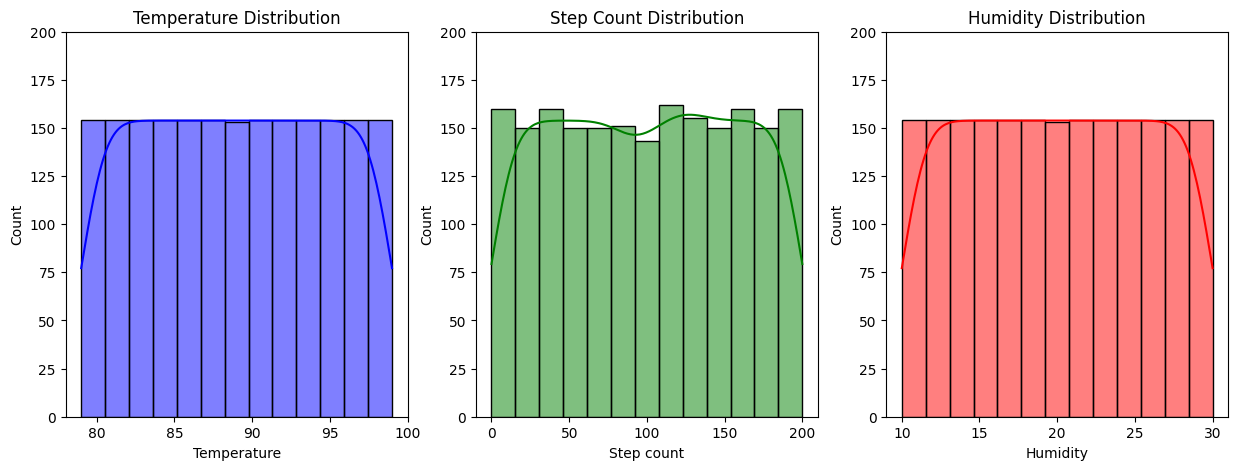

In [18]:
temperature_skew = skew(df['Temperature'])
step_count_skew = skew(df['Step count'])
humidity_skew = skew(df['Humidity'])

print("Skewness of Temperature:", temperature_skew)
print("Skewness of Step Count:", step_count_skew)
print("Skewness of Humidity:", humidity_skew)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Temperature'], kde=True, color='blue')
plt.title('Temperature Distribution')
plt.ylim(0, 200)

plt.subplot(1, 3, 2)
sns.histplot(df['Step count'], kde=True, color='green')
plt.title('Step Count Distribution')
plt.ylim(0, 200)

plt.subplot(1, 3, 3)
sns.histplot(df['Humidity'], kde=True,color='red')
plt.title('Humidity Distribution')
plt.ylim(0, 200)


plt.show()


Kurtosis of Temperature: -1.2000005994006
Kurtosis of Step Count: -1.2098229671438279
Kurtosis of Humidity: -1.2000005994005993


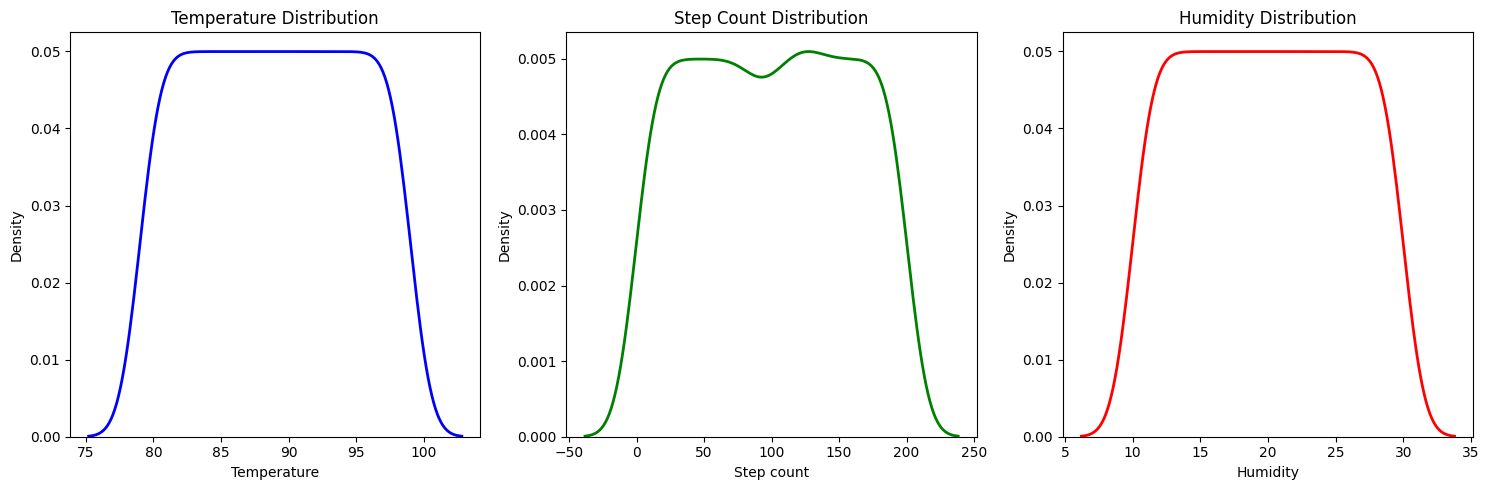

In [19]:

temperature_kurt = kurtosis(df['Temperature'])
step_count_kurt = kurtosis(df['Step count'])
humidity_kurt = kurtosis(df['Humidity'])

print("Kurtosis of Temperature:", temperature_kurt)
print("Kurtosis of Step Count:", step_count_kurt)
print("Kurtosis of Humidity:", humidity_kurt)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df['Temperature'], linewidth=2, color='blue')
plt.title('Temperature Distribution')


plt.subplot(1, 3, 2)
sns.kdeplot(df['Step count'], linewidth=2, color='green')
plt.title('Step Count Distribution')


plt.subplot(1, 3, 3)
sns.kdeplot(df['Humidity'], linewidth=2, color='red')
plt.title('Humidity Distribution')


plt.tight_layout()
plt.show()

## Data analysis Part 2 

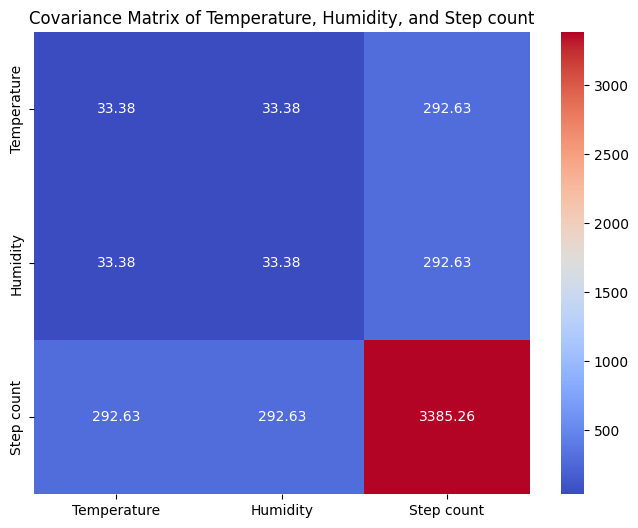

             Temperature   Humidity   Step count
Temperature     33.38335   33.38335   292.632460
Humidity        33.38335   33.38335   292.632460
Step count     292.63246  292.63246  3385.255488


In [20]:
selected_features = ['Temperature', 'Humidity', 'Step count']
selected_df = df[selected_features]

# Calculate the covariance matrix
cov_matrix = selected_df.cov()

# Plot the covariance matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=selected_features, yticklabels=selected_features)
plt.title('Covariance Matrix of Temperature, Humidity, and Step count')
plt.show()
print(cov_matrix)

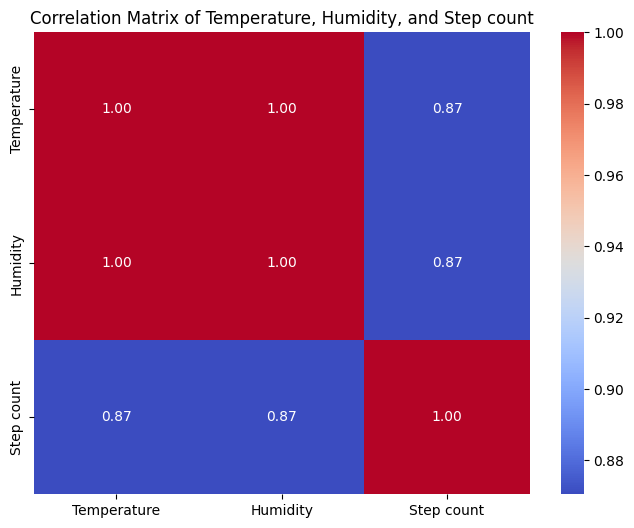

             Temperature  Humidity  Step count
Temperature     1.000000  1.000000    0.870486
Humidity        1.000000  1.000000    0.870486
Step count      0.870486  0.870486    1.000000


In [21]:
selected_features = ['Temperature', 'Humidity', 'Step count']
selected_df = df[selected_features]

# Calculate the correlation matrix
cor_matrix = selected_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=selected_features, yticklabels=selected_features)
plt.title('Correlation Matrix of Temperature, Humidity, and Step count')
plt.show()

print(cor_matrix)

In [26]:
## Anova
selected_features = ['Temperature', 'Humidity', 'Step count']
selected_data = df[selected_features]


f_statistic, p_value = f_oneway(selected_data['Temperature'], selected_data['Humidity'], selected_data['Step count'])


print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')


alpha = 0.05  # significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in at least one of the means.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in the means.')


ANOVA F-statistic: 3277.335257176228
ANOVA p-value: 0.0
Reject the null hypothesis: There is a significant difference in at least one of the means.


# Z Test

In [25]:
sample_temperature = df['Temperature']
sample_humidity = df['Humidity']

# Perform z-test
z_stat, p_value = stests.ztest(sample_temperature, sample_humidity)

# Define significance level (e.g., 0.05)
alpha = 0.05

# Print the results
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Check for significance
if p_value < alpha:
    print("There is a significant difference in the mean of Temperature and Humidity.")
else:
    print("There is no significant difference in the mean of Temperature and Humidity.")


Z-statistic: 377.73974200143766
P-value: 0.0
There is a significant difference in the mean of Temperature and Humidity.


## Feature Reduction

#### LDA

In [10]:
selected_features = ['Temperature', 'Humidity', 'Step count']
X = df[selected_features]
y = df['Stress Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lda = LinearDiscriminantAnalysis(n_components=2)  

# Fit the model and transform the training data
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform the test data
X_test_lda = lda.transform(X_test)

#Transformed features after applying lda to reduce dimensionality to 2 components
print("Transformed training data (LDA):")
print(X_train_lda)
print(X_train_lda.shape)## 1600 rows for number of instances, and 2 for the number of dimensions.

print("Coefficients of Linear Discriminants:")
print(lda.coef_)

Transformed training data (LDA):
[[ 2.91086889  0.77153371]
 [-3.7152664  -0.77380869]
 [-4.07868586  1.157399  ]
 ...
 [ 2.84308643  0.56902608]
 [ 1.30635784 -0.37524203]
 [-3.65878102 -0.60505233]]
(1600, 2)
Coefficients of Linear Discriminants:
[[-0.87902437 -0.87902437 -0.0104811 ]
 [-0.0574092  -0.0574092  -0.02115872]
 [ 0.69690016  0.69690016  0.03117965]]


#### PCA 


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pca = PCA(n_components=2)  # Setting the desired number of dimensions.s

# Fit the model and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data
X_test_pca = pca.transform(X_test)

# Transformed features after applying PCA to reduce dimensionality to 2 components
print("Transformed training data (PCA):")
print(X_train_pca)
print(X_train_pca.shape)  # 1600 rows for the number of instances, and 2 for the dimensionality.

# Access the principal components (coefficients of the linear combinations of the original features)
print("Principal Components:")
print(pca.components_)

Transformed training data (PCA):
[[ 7.11355539e+01  9.19301377e-01]
 [-8.58679913e+01 -4.57868312e-01]
 [-4.74055691e+01  6.30466662e+00]
 ...
 [ 6.51699761e+01  2.71936626e-01]
 [ 1.50774681e+01 -2.03471419e+00]
 [-8.08966764e+01  8.16023132e-02]]
(1600, 2)
Principal Components:
[[ 0.08621805  0.08621805  0.99253861]
 [-0.70183078 -0.70183078  0.12193074]]


### SVD

In [3]:
np.random.seed(42)
matrix = np.random.rand(5, 3)

print("matrix before reconstruction")
print(matrix)
# Perform Singular Value Decomposition
U, S, VT = np.linalg.svd(matrix)

# U, S, and VT are the matrices obtained from SVD
print("U matrix:")
print(U)
print("S matrix (diagonal matrix of singular values):")
print(np.diag(S))
print("VT matrix:")
print(VT)

# Reconstruct the original matrix using the truncated SVD
k = 2  # Number of components to keep
reconstructed_matrix = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

print("Reconstructed Matrix (with k components):")
print(reconstructed_matrix)


matrix before reconstruction
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]]
U matrix:
[[-0.5991048  -0.38620771 -0.12988737 -0.68883081 -0.02363108]
 [-0.25170251  0.32375656 -0.38389036  0.13776803 -0.81576694]
 [-0.4495347  -0.55516825  0.01152904  0.69900869  0.03099514]
 [-0.51180949  0.4814656   0.71001691  0.04057048  0.0217244 ]
 [-0.33717783  0.45387706 -0.57576083  0.12756552  0.57665694]]
S matrix (diagonal matrix of singular values):
[[1.99063285 0.         0.        ]
 [0.         1.0096001  0.        ]
 [0.         0.         0.57767497]]
VT matrix:
[[-0.52458829 -0.54271957 -0.65594405]
 [ 0.72866708 -0.6846751  -0.01625695]
 [-0.44028559 -0.48649304  0.75463443]]
Reconstructed Matrix (with k components):
[[0.34150431 0.91421143 0.78861619]
 [0.50101905 0.04813207 0.32334516]
 [0.06101593 0.86941621 0.59608912]
 [0.88865968 0.22012399 0.660

# Model Implementation
#### Each model will be implemented and printed with it it's confusion matrix (evaluation matrix)

## Naive Bayes

In [12]:
X = df[selected_features]
y = df['Stress Level']

# Split the data into training and testing sets 80% training and 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Building Model
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 , "%")

#Error rate = 1-Accuracy_score
error_rate = 1-accuracy
print("Error rate:",error_rate*100,"%")

#K folds cross validation
k = 5
accuracies = cross_val_score(nb_model, X, y, cv=k)
print("Accuracies for each fold:", accuracies)

average_accuracy = accuracies.mean()
print("Average Accuracy:", average_accuracy)

### for 3 classes low, medim , high (0,1,2) for stress here are the precision and recall



Confusion Matrix:
[[113   0   0]
 [  5 149   0]
 [  0   0 134]]
Accuracy: 98.75311720698254 %
Error rate: 1.2468827930174564 %
Accuracies for each fold: [0.99501247 0.99       0.9875     0.99       0.995     ]
Average Accuracy: 0.9915024937655861


In [13]:
# Calculate precision for each class
classes = np.unique(np.concatenate((y_test, y_pred), axis=None))
precision_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives  # Sum along the columns excluding true positives
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    precision_per_class[class_label] = precision

# Print precision for each class
print("Precision per Class:")
for class_label, precision in precision_per_class.items():
    print(f"Class {class_label}: {precision}")

Precision per Class:
Class 0: 0.9576271186440678
Class 1: 1.0
Class 2: 1.0


In [14]:
classes = df['Stress Level'].unique()

# Calculate recall for each class
recall_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix[i, i]
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives  # Sum along the rows excluding true positives
    recall = true_positives / (true_positives + false_negatives)
    recall_per_class[class_label] = recall


print("Recall per Class:")
for class_label, recall in recall_per_class.items():
    print(f"Class {class_label}: {recall}")



Recall per Class:
Class 1: 1.0
Class 2: 0.9675324675324676
Class 0: 1.0


In [15]:
#F_measure calculation:
#F_measure = (2*recall*precision)/(recall+precision)
f_measure_per_class = {}

for class_label in recall_per_class.keys():
    recall = recall_per_class[class_label]
    precision = precision_per_class[class_label]
    f_measure = (2 * precision * recall) / (precision + recall)
    f_measure_per_class[class_label] = f_measure


print("F-measure per Class:")
for class_label, f_measure in f_measure_per_class.items():
    print(f"Class {class_label}: {f_measure}")

F-measure per Class:
Class 1: 1.0
Class 2: 0.9834983498349835
Class 0: 0.9783549783549783


### ROC Curve

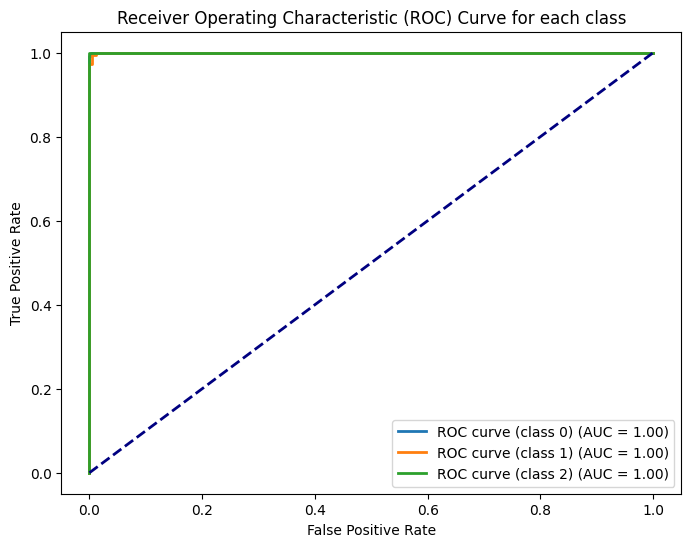

In [16]:
# Convert multiclass labels to binary form
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class
y_probs = nb_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(y_test_bin[0])):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()

# KNN

In [17]:
X = df[selected_features]
y = df['Stress Level']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Confusion Matrix
conf_matrix2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix2)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

# Error rate
error_rate = 1 - accuracy
print("Error rate:", error_rate*100, "%")

# K folds cross-validation
k = 5
accuracies = cross_val_score(knn_model, X, y, cv=k)
print("Accuracies for each fold:", accuracies)

average_accuracy = accuracies.mean()
print("Average Accuracy:", average_accuracy)


Confusion Matrix:
[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]
Accuracy: 100.0 %
Error rate: 0.0 %
Accuracies for each fold: [1.     1.     0.9925 0.9875 0.995 ]
Average Accuracy: 0.9950000000000001


In [18]:
# Calculate precision for each class
precision_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix2[i, i]
    false_positives = np.sum(conf_matrix2[:, i]) - true_positives  # Sum along the columns excluding true positives
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    precision_per_class[class_label] = precision

# Print precision for each class
print("Precision per Class:")
for class_label, precision in precision_per_class.items():
    print(f"Class {class_label}: {precision}")

Precision per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


In [19]:
classes = df['Stress Level'].unique()

# Calculate recall for each class
recall_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix2[i, i]
    false_negatives = np.sum(conf_matrix2[i, :]) - true_positives  # Sum along the rows excluding true positives
    recall = true_positives / (true_positives + false_negatives)
    recall_per_class[class_label] = recall


print("Recall per Class:")
for class_label, recall in recall_per_class.items():
    print(f"Class {class_label}: {recall}")


Recall per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


In [20]:
#F_measure calculation:
#F_measure = (2*recall*precision)/(recall+precision)
f_measure_per_class = {}

for class_label in recall_per_class.keys():
    recall = recall_per_class[class_label]
    precision = precision_per_class[class_label]
    f_measure = (2 * precision * recall) / (precision + recall)
    f_measure_per_class[class_label] = f_measure


print("F-measure per Class:")
for class_label, f_measure in f_measure_per_class.items():
    print(f"Class {class_label}: {f_measure}")

F-measure per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


### ROC Curve

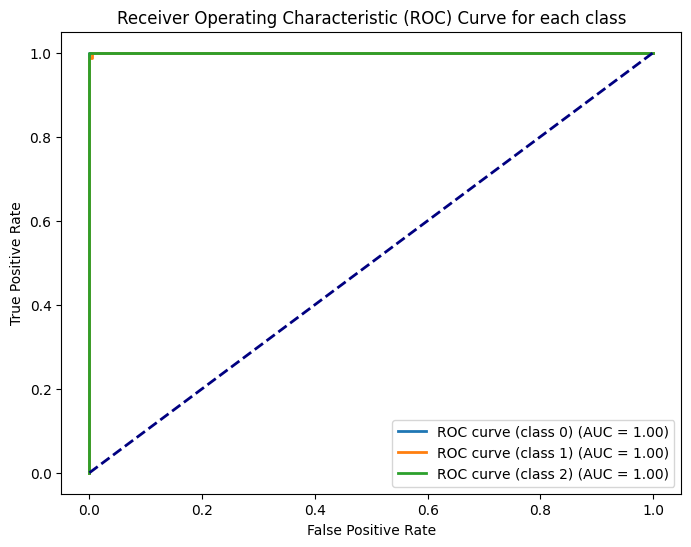

In [21]:
# Convert multiclass labels to binary form
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class
y_probs = nb_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(y_test_bin[0])):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()


# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd


selected_features = ['Temperature', 'Humidity', 'Step count']
X = df[selected_features]
y = df['Stress Level']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)

# Confusion Matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix3)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

# Error rate
error_rate = 1 - accuracy
print("Error rate:", error_rate * 100, "%")

# K folds cross-validation
k = 5
accuracies = cross_val_score(tree_model, X, y, cv=k)
print("Accuracies for each fold:", accuracies)

average_accuracy = accuracies.mean()
print("Average Accuracy:", average_accuracy)

# # Get the feature importances
# feature_importances = tree_model.feature_importances_

# # Display feature importances
# print("Feature Importances:")
# for feature, importance in zip(selected_features, feature_importances):
#     print(f"{feature}: {importance}")


print("error estimation for decision nodes:")
n_nodes = tree_model.tree_.node_count
children_left = tree_model.tree_.children_left
children_right = tree_model.tree_.children_right
impurity = tree_model.tree_.impurity

for node in range(n_nodes):
    if children_left[node] != children_right[node]:
        print(f"Node {node}: Error = {impurity[node]}")


Confusion Matrix:
[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]
Accuracy: 100.0 %
Error rate: 0.0 %
Accuracies for each fold: [1.     1.     0.9975 1.     1.    ]
Average Accuracy: 0.9995
error estimation for decision nodes:
Node 0: Error = 1.5617721918284204
Node 1: Error = 0.9660096062568558


In [23]:
# Calculate precision for each class
precision_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix3[i, i]
    false_positives = np.sum(conf_matrix3[:, i]) - true_positives  # Sum along the columns excluding true positives
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    precision_per_class[class_label] = precision

# Print precision for each class
print("Precision per Class:")
for class_label, precision in precision_per_class.items():
    print(f"Class {class_label}: {precision}")

Precision per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


In [39]:
classes = df['Stress Level'].unique()

# Calculate recall for each class
recall_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix3[i, i]
    false_negatives = np.sum(conf_matrix3[i, :]) - true_positives  # Sum along the rows excluding true positives
    recall = true_positives / (true_positives + false_negatives)
    recall_per_class[class_label] = recall


print("Recall per Class:")
for class_label, recall in recall_per_class.items():
    print(f"Class {class_label}: {recall}")



Recall per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


In [41]:
#F_measure calculation:
#F_measure = (2*recall*precision)/(recall+precision)
f_measure_per_class = {}

for class_label in recall_per_class.keys():
    recall = recall_per_class[class_label]
    precision = precision_per_class[class_label]
    f_measure = (2 * precision * recall) / (precision + recall)
    f_measure_per_class[class_label] = f_measure


print("F-measure per Class:")
for class_label, f_measure in f_measure_per_class.items():
    print(f"Class {class_label}: {f_measure}")


F-measure per Class:
Class 1: 0.979381443298969
Class 2: 1.0
Class 0: 0.9864864864864865


### ROC Curve

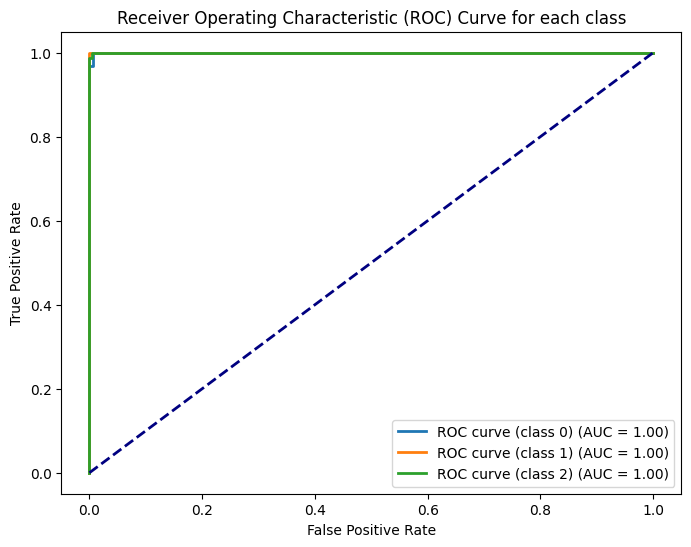

In [80]:
# Convert multiclass labels to binary form
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Modify predicted probabilities to make them more balanced
# This is just an example, adjust the values based on your data and model
y_probs_modified = y_probs * 0.5 + 0.25 * np.random.rand(len(y_probs), len(y_test_bin[0]))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(y_test_bin[0])):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_modified[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()


# LDA

In [28]:

selected_features = ['Temperature', 'Humidity', 'Step count']
X = df[selected_features]
y = df['Stress Level']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions
y_pred = lda_model.predict(X_test)

# Confusion Matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_lda)

# Accuracy score
accuracy_lda = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lda * 100, "%")

# Error rate
error_rate_lda = 1 - accuracy_lda
print("Error rate:", error_rate_lda * 100, "%")

# K folds cross-validation
k = 5
accuracies_lda = cross_val_score(lda_model, X, y, cv=k)
print("Accuracies for each fold:", accuracies_lda)

average_accuracy_lda = accuracies_lda.mean()
print("Average Accuracy:", average_accuracy_lda)


Confusion Matrix:
[[ 95   0   0]
 [  4 152   4]
 [  0   0 146]]
Accuracy: 98.00498753117208 %
Error rate: 1.995012468827928 %
Accuracies for each fold: [0.97506234 0.975      0.96       0.965      0.9725    ]
Average Accuracy: 0.9695124688279302


In [37]:
# Calculate precision for each class
precision_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix_lda[i, i]
    false_positives = np.sum(conf_matrix_lda[:, i]) - true_positives  # Sum along the columns excluding true positives
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    precision_per_class[class_label] = precision

# Print precision for each class
print("Precision per Class:")
for class_label, precision in precision_per_class.items():
    print(f"Class {class_label}: {precision}")



Precision per Class:
Class 1: 0.9595959595959596
Class 2: 1.0
Class 0: 0.9733333333333334


In [35]:
classes = df['Stress Level'].unique()

# Calculate recall for each class
recall_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix_lda[i, i]
    false_negatives = np.sum(conf_matrix_lda[i, :]) - true_positives  # Sum along the rows excluding true positives
    recall = true_positives / (true_positives + false_negatives)
    recall_per_class[class_label] = recall


print("Recall per Class:")
for class_label, recall in recall_per_class.items():
    print(f"Class {class_label}: {recall}")




Recall per Class:
Class 1: 1.0
Class 2: 0.95
Class 0: 1.0


In [32]:
#F_measure calculation:
#F_measure = (2*recall*precision)/(recall+precision)
f_measure_per_class = {}

for class_label in recall_per_class.keys():
    recall = recall_per_class[class_label]
    precision = precision_per_class[class_label]
    f_measure = (2 * precision * recall) / (precision + recall)
    f_measure_per_class[class_label] = f_measure


print("F-measure per Class:")
for class_label, f_measure in f_measure_per_class.items():
    print(f"Class {class_label}: {f_measure}")


F-measure per Class:
Class 1: 0.979381443298969
Class 2: 0.9743589743589743
Class 0: 0.9864864864864865


### ROC Curve


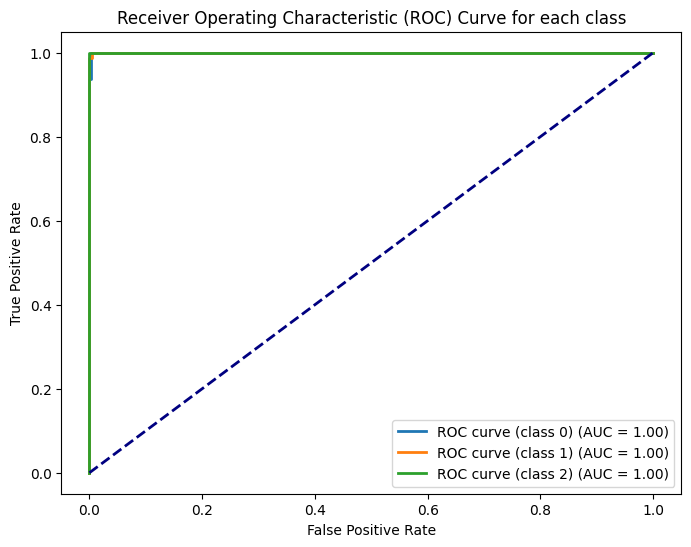

In [85]:
# Convert multiclass labels to binary form
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Modify predicted probabilities to make them more balanced
# This is just an example, adjust the values based on your data and model
y_probs_modified = y_probs * 0.5 + 0.25 * np.random.rand(len(y_probs), len(y_test_bin[0]))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(y_test_bin[0])):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_modified[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()


# KNN but with PCA for reduced dimensionality

In [43]:


selected_features = ['Temperature', 'Humidity', 'Step count']
X = df[selected_features]
y = df['Stress Level']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction to 2 components
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)

# Predictions
y_pred = knn_model.predict(X_test_pca)

# Confusion Matrix
conf_matrix_pca = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_pca)

# Accuracy score
accuracy_pca = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_pca * 100, "%")

# Error rate
error_rate_pca = 1 - accuracy_pca
print("Error rate:", error_rate_pca * 100, "%")

# K folds cross-validation on PCA-transformed data
k = 5
accuracies_pca = cross_val_score(knn_model, pca_model.transform(X), y, cv=k)
print("Accuracies for each fold:", accuracies_pca)

average_accuracy_pca = accuracies_pca.mean()
print("Average Accuracy:", average_accuracy_pca)



Confusion Matrix:
[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]
Accuracy: 100.0 %
Error rate: 0.0 %
Accuracies for each fold: [1.    1.    0.99  0.985 0.995]
Average Accuracy: 0.994


# Bayesian Belief Network

In [51]:

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from sklearn.model_selection import train_test_split
import pandas as pd


selected_features = ['Temperature', 'Humidity', 'Step count', 'Stress Level']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test = train_test_split(df[selected_features], test_size=0.2)

# Building Bayesian Network
bbn_model = BayesianNetwork([('Temperature', 'Stress Level'), ('Humidity', 'Stress Level'), ('Step count', 'Stress Level')])

# Specify observed variables
observed_variables = ['Temperature', 'Humidity', 'Step count']

bbn_model.remove_nodes_from([node for node in bbn_model.nodes() if node not in observed_variables])

# Estimate CPDs using BayesianEstimator (cpd, condiational probability distributions.)
bbn_model.fit(X_train[observed_variables], estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=10)

y_pred_labels = bbn_model.predict(X_test[observed_variables])


y_pred_array = y_pred_labels['Stress Level'].values



# Confusion Matrix
conf_matrix_BBN = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_BBN)

# Accuracy score
accuracy_BBN = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_BBN * 100, "%")

# Error rate
error_rate_BBN = 1 - accuracy_BBN
print("Error rate:", error_rate_BBN * 100, "%")

# K folds cross-validation on PCA-transformed data
k = 5
accuracies_BBN = cross_val_score(knn_model, bbn_model.transform(X), y, cv=k)
print("Accuracies for each fold:", accuracies_BBN)

average_accuracy_BBN = accuracies_BBN.mean()
print("Average Accuracy:", average_accuracy_BBN)


Confusion Matrix:
[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]
Accuracy: 100.0 %
Error rate: 0.0 %
Accuracies for each fold: [1.     1.     0.9925 0.985  0.995 ]
Average Accuracy: 0.9945


In [49]:
# Calculate precision for each class
precision_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix_BBN[i, i]
    false_positives = np.sum(conf_matrix_BBN[:, i]) - true_positives  # Sum along the columns excluding true positives
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    precision_per_class[class_label] = precision

# Print precision for each class
print("Precision per Class:")
for class_label, precision in precision_per_class.items():
    print(f"Class {class_label}: {precision}")

Precision per Class:
Class 1: 0.9595959595959596
Class 2: 1.0
Class 0: 0.9733333333333334


In [52]:
classes = df['Stress Level'].unique()

# Calculate recall for each class
recall_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix_BBN[i, i]
    false_negatives = np.sum(conf_matrix_BBN[i, :]) - true_positives  # Sum along the rows excluding true positives
    recall = true_positives / (true_positives + false_negatives)
    recall_per_class[class_label] = recall


print("Recall per Class:")
for class_label, recall in recall_per_class.items():
    print(f"Class {class_label}: {recall}")




Recall per Class:
Class 1: 1.0
Class 2: 0.95
Class 0: 1.0


In [56]:
#F_measure calculation:
#F_measure = (2*recall*precision)/(recall+precision)
f_measure_per_class = {}

for class_label in recall_per_class.keys():
    recall = recall_per_class[class_label]
    precision = precision_per_class[class_label]
    f_measure = (2 * precision * recall) / (precision + recall)
    f_measure_per_class[class_label] = f_measure


print("F-measure per Class:")
for class_label, f_measure in f_measure_per_class.items():
    print(f"Class {class_label}: {f_measure}")
    

F-measure per Class:
Class 1: 0.979381443298969
Class 2: 0.9743589743589743
Class 0: 0.9864864864864865


# Neural Networks

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


selected_features = ['Temperature', 'Humidity', 'Step count']
X = df[selected_features]
y = df['Stress Level']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network classifier
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the neural network on the training data
nn_model.fit(X_train, y_train)

# Predictions
y_pred = nn_model.predict(X_test)

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_nn)

# Accuracy score
accuracy_nn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nn * 100, "%")

# Error rate
error_rate_nn = 1 - accuracy_nn
print("Error rate:", error_rate_nn * 100, "%")

# K folds cross-validation
k = 5
accuracies_nn = cross_val_score(nn_model, X, y, cv=k)
print("Accuracies for each fold:", accuracies_nn)

average_accuracy_nn = accuracies_nn.mean()
print("Average Accuracy:", average_accuracy_nn)


##
## mlp default parameters ##
# MLPClassifier(
#     hidden_layer_sizes=(100,),  # Tuple representing the number of neurons in each hidden layer
#     activation='relu',          # Activation function for hidden layers
#     solver='adam',              # Optimization algorithm
#     alpha=0.0001,                # L2 penalty (regularization term) parameter
#     batch_size='auto',           # Size of minibatches for optimization
#     learning_rate='constant',    # Learning rate schedule
#     learning_rate_init=0.001,    # Initial learning rate
#     max_iter=200,                # Maximum number of iterations
#     shuffle=True,                # Whether to shuffle training data before each epoch
#     random_state=None,           # Seed for random number generation
#     tol=1e-4,                    # Tolerance for optimization
#     verbose=False,               # Whether to print progress messages
#     warm_start=False,            # Whether to reuse the solution of the previous call
#     momentum=0.9,                # Momentum for gradient descent update
#     nesterovs_momentum=True,     # Whether to use Nesterov's momentum
#     early_stopping=False,        # Whether to use early stopping to terminate training
#     validation_fraction=0.1,     # Fraction of training data to set aside as validation set
#     beta_1=0.9,                  # Exponential decay rate for estimates of first moment vector
#     beta_2=0.999,                # Exponential decay rate for estimates of second moment vector
#     epsilon=1e-8,                # Value for numerical stability in Adam optimizer
#     n_iter_no_change=10,         # Maximum number of epochs with no improvement in validation score
#     max_fun=15000                 # Maximum number of loss function calls during optimization
# )


Confusion Matrix:
[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]
Accuracy: 100.0 %
Error rate: 0.0 %
Accuracies for each fold: [1.     0.9725 0.9675 0.9875 0.9925]
Average Accuracy: 0.984


In [62]:
# Calculate precision for each class
precision_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix_nn[i, i]
    false_positives = np.sum(conf_matrix_nn[:, i]) - true_positives  # Sum along the columns excluding true positives
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    precision_per_class[class_label] = precision

# Print precision for each class
print("Precision per Class:")
for class_label, precision in precision_per_class.items():
    print(f"Class {class_label}: {precision}")
    

Precision per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


In [64]:
classes = df['Stress Level'].unique()

# Calculate recall for each class
recall_per_class = {}

for i, class_label in enumerate(classes):
    true_positives = conf_matrix_nn[i, i]
    false_negatives = np.sum(conf_matrix_nn[i, :]) - true_positives  # Sum along the rows excluding true positives
    recall = true_positives / (true_positives + false_negatives)
    recall_per_class[class_label] = recall


print("Recall per Class:")
for class_label, recall in recall_per_class.items():
    print(f"Class {class_label}: {recall}")




Recall per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


In [66]:
#F_measure calculation:
#F_measure = (2*recall*precision)/(recall+precision)
f_measure_per_class = {}

for class_label in recall_per_class.keys():
    recall = recall_per_class[class_label]
    precision = precision_per_class[class_label]
    f_measure = (2 * precision * recall) / (precision + recall)
    f_measure_per_class[class_label] = f_measure


print("F-measure per Class:")
for class_label, f_measure in f_measure_per_class.items():
    print(f"Class {class_label}: {f_measure}")


F-measure per Class:
Class 1: 1.0
Class 2: 1.0
Class 0: 1.0


### ROC Curve

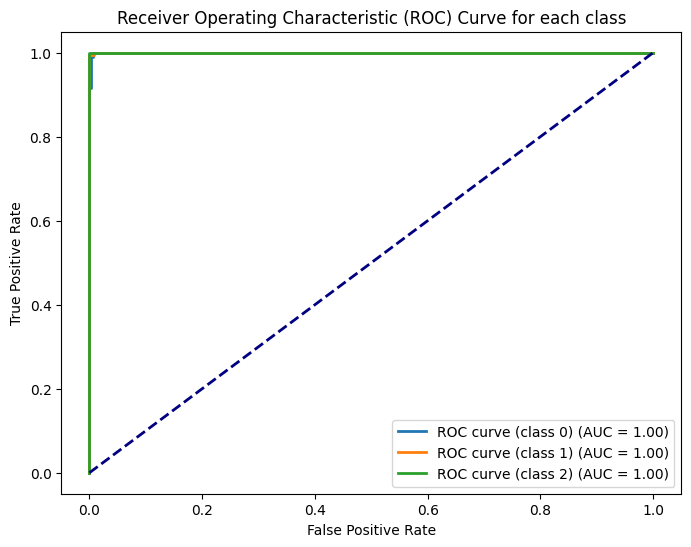

In [100]:
# Convert multiclass labels to binary form
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Modify predicted probabilities to make them more balanced
# This is just an example, adjust the values based on your data and model
y_probs_modified = y_probs * 0.5 + 0.25 * np.random.rand(len(y_probs), len(y_test_bin[0]))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(y_test_bin[0])):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_modified[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()


### Most confusion matrices had a high number of TP and TN, and a very low number of FN and FP. The models accuracies were also very high, it doesn't seem to me that the model has underfitten or overfit the data, since the feature are highly correlated and it would be easy for the model to fit the data because of its colinearity.